In [17]:
# Initial imports
import pandas as pd

from datetime import datetime, timedelta

from env import get_db_url
import scott_wrangle

import warnings
warnings.filterwarnings("ignore")

# Wrangle
- Reads in the 'webtraffic.csv' file from the working directory. If it isn't there it is SQL queried from the curriculum database on the Codeup server
- Joins the tables on cohort id
- Sets datetime as the index
- Saves the dataframe to a webtraffic.csv file if it wasn't already there

In [18]:
# Bring in the data
df = wrangle.wrangle_webtraffic()

# Explore
Questions to answer:
- 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

## Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

### Filter the dataframe to student webtraffic in 2019

In [19]:
# Filter the dataframe to just student entries in 2019 and stores it in the filtered dataframe 'df_f'
df_f = df[(df.index > '2018-12-31') & (df.index < '2020-01-01') & (df.name != 'Staff')]

### Identify what the different program id's mean

#### Program start dates

In [20]:
# When did program 1 start?
df_f[df_f.program_id == 1].start_date.min()

'2014-02-04'

In [21]:
# When did program 2 start?
df_f[df_f.program_id == 2].start_date.min()

'2016-09-26'

In [22]:
# When did program 3 start?
df_f[df_f.program_id == 3].start_date.min()

'2019-08-19'

In [23]:
# When did program 4 start?
df_f[df_f.program_id == 4].start_date.min()

nan

#### Program end dates

In [24]:
# When did program 1 end?
df[df.program_id == 1].end_date.max()

'2017-09-22'

In [25]:
# When did program 2 end?
df[df.program_id == 2].end_date.max()

'2021-10-01'

In [26]:
# When did program 3 end?
df[df.program_id == 3].end_date.max()

'2021-09-03'

In [27]:
# When did program 4 end?
df[df.program_id == 4].end_date.max()

'2015-07-29'

## Observations:
- program 1 is the oldest program (Feb 2014)
- program 2 was started later (Sep 2016)
- program 3 was started after program 2 (Aug 2019)
- program 4 was only around for approximately 1 cohort (~July 2015)

## Next step: Investigate the paths accessed by different program id's to get a better sense of which id's represent whch programs.

In [28]:
# View which paths were accessed by program 1
list(df_f[df_f.program_id == 1].path.unique())

['/',
 'content/html-css',
 'content/html-css/css-i',
 'content/html-css/css-i/introduction.html',
 'content/html-css/css-i/selectors-and-properties.html',
 'content/laravel/intro',
 'content/laravel/intro/gitbook/images/favicon.ico',
 'content/laravel/intro/environment.html',
 'content/laravel/intro/application-structure.html',
 'content/laravel/quickstart/composer.html',
 'content/laravel/quickstart/gitbook/images/favicon.ico',
 'content/laravel/quickstart/seeders.html',
 'content/laravel/more-features/readme.html',
 'content/laravel/more-features/gitbook/images/favicon.ico',
 'content/php_i',
 'content/php_i/gitbook/images/favicon.ico',
 'content/php_ii',
 'content/php_ii/gitbook/images/favicon.ico',
 'content/php_iii',
 'content/php_iii/gitbook/images/favicon.ico',
 'content/mysql/intro-to-mysql',
 'content/mysql/intro-to-mysql/gitbook/images/favicon.ico',
 'content/php_iv',
 'content/php_iv/gitbook/images/favicon.ico',
 'content/javascript_ii',
 'content/javascript_ii/gitbook/imag

## Observation:
- Paths accessed by program 1 look like a mix of web dev and data science curriculum

In [29]:
# View which paths were accessed by program 2
list(df_f[df_f.program_id == 2].path.unique())

['java-iii/mvc',
 'java-i',
 'java-i/strings',
 'java-i/methods',
 '/',
 'toc',
 'javascript-ii',
 'jquery',
 'jquery/simple-simon',
 'java-iii',
 'mysql',
 'java-i/syntax-types-and-variables',
 'java-i/console-io',
 'java-i/control-statements-and-loops',
 'java-iii/deployment-and-dependencies',
 'java-iii/servlets',
 'java-iii/jsp-and-jstl',
 'java-iii/sessions-and-cookies',
 'java-iii/jdbc',
 'java-ii',
 'javascript-i',
 'appendix/further-reading/java/intellij-tomcat-configuration',
 'search/search_index.json',
 'appendix/angular',
 'appendix/angular/templating',
 'javascript-ii/promises',
 'javascript-ii/npm',
 'javascript-ii/modules',
 'javascript-ii/ajax-api',
 'javascript-i/introduction',
 'javascript-i/introduction/primitive-types',
 'javascript-i/introduction/operators',
 'javascript-i/introduction/variables',
 'javascript-i/introduction/working-with-data-types-operators-and-variables',
 'javascript-i/javascript-with-html',
 'javascript-i/functions',
 'java-i/introduction-to-ja

## Observation:
- Paths accessed by program 2 look exclusively like web dev subjects

In [30]:
# View which paths were accessed by program 3
list(df_f[df_f.program_id == 3].path.unique())

['/',
 '3-sql/1-mysql-overview',
 '2-storytelling/bad-charts',
 '2-storytelling/misleading1_baseball.jpg',
 '2-storytelling/misleading1_fox.jpg',
 '2-storytelling/misleading3_deaths.jpg',
 'appendix/cli-git-overview',
 '1-fundamentals/1.1-intro-to-data-science',
 '1-fundamentals/modern-data-scientist.jpg',
 '1-fundamentals/AI-ML-DL-timeline.jpg',
 '1-fundamentals/1.2-data-science-pipeline',
 '1-fundamentals/DataToAction_v2.jpg',
 'search/search_index.json',
 '13-advanced-topics/3.7-styling-webpages',
 '1-fundamentals/1.3-pipeline-demo',
 '1-fundamentals/2.1-excel-overview',
 '3-vocabulary.md',
 '6-regression/1-overview',
 '10-anomaly-detection/1-overview',
 '10-anomaly-detection/AnomalyDetectionCartoon.jpeg',
 '11-nlp/1-overview',
 '6-regression/2-regression-excel',
 '6-regression/3.1-acquire-and-prep',
 '6-regression/3.2-split-and-scale',
 '6-regression/3.3-explore',
 '6-regression/3.4-feature-engineering',
 '6-regression/3.5-modeling',
 '6-regression/3.6-evaluation',
 '6-regression/e

## Observation:
- Paths accessed by program 3 look exclusively like data science topics

In [31]:
# View which paths were accessed by program 4
list(df_f[df_f.program_id == 4].path.unique())

[]

## Observation:
- There were no paths accessed by program 4

## Working theory:
- All curriculum was kept in the same place at the beginning of Codeup (now listed as program 1)
- Later, curriculum specific to web development was distilled into a smaller list, new web dev students were coded with program id 2 and given access exclusively to this smaller curated list
- Originally when data science started, student's had access to the full curriculum until August 2019 when new data science student's were coded as program 3 and were given access only to a smaller list of curated data science topics
- Program 4's identity is unknown but it is certainly not web dev or data science because it was so short lived.
#
## Conclusion
- The only programs to be concerned with are program 2 (Webdev) and program 3 (Data Science)
#

## Next Step: graph the access to paths by program id
### It is assumed that ds students will access webdev paths dramatically less than ds paths and vice versa so that is where I will look for the cross-course traffic

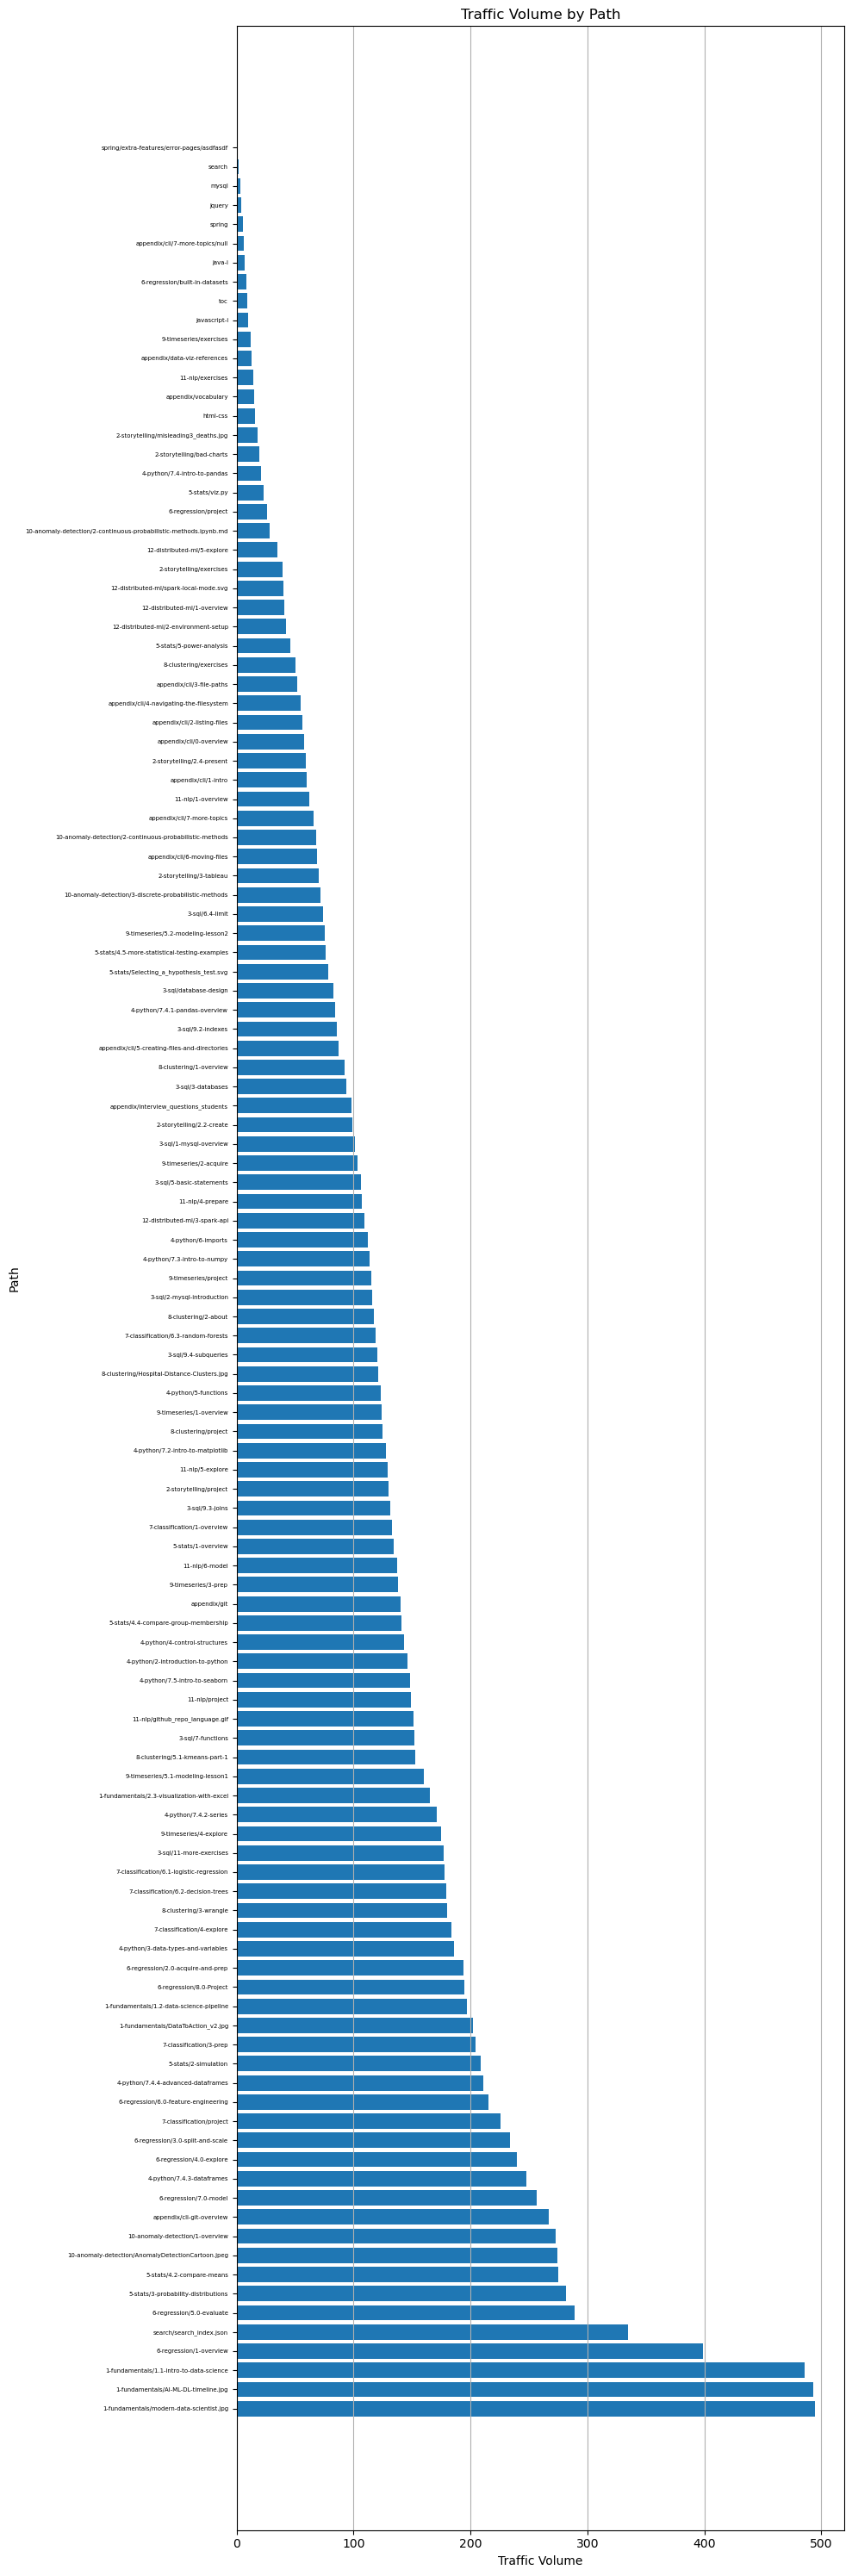

In [119]:
# Create a dataframe of the 2019 data, from data science students
ds_traffic = pd.DataFrame(df_f[df_f.program_id == 3].path.value_counts()).reset_index().rename(columns={'path': 'traffic_vol'})\
.rename(columns={'index': 'path'})

# Create a dataframe of the 2019 data, groupby traffic volume (each traffic amount theoretically is unique to each path)
# and sort to start with the highest volume paths first
temp = pd.merge(df_f[(df_f.program_id == 3) & (df_f.path != '/')], ds_traffic, on='path', how='left').groupby('traffic_vol')\
['path', 'traffic_vol'].max().sort_index(ascending=False)

# Plot the figure
plt.figure(figsize=(10, 30)) 
plt.barh(temp["path"], temp["traffic_vol"])
plt.xlabel("Traffic Volume")
plt.ylabel("Path")
plt.title("Traffic Volume by Path")
plt.yticks(fontsize=5)
plt.grid(axis='x')
plt.tight_layout()

## Web dev paths accessed by ds students
- ‘error-pages/asdfasdf’ 
- ‘jquery’
- ’spring’
- ‘Java-i’
- ‘Toc’
- ‘Javascript-i’
- ‘Html-css’


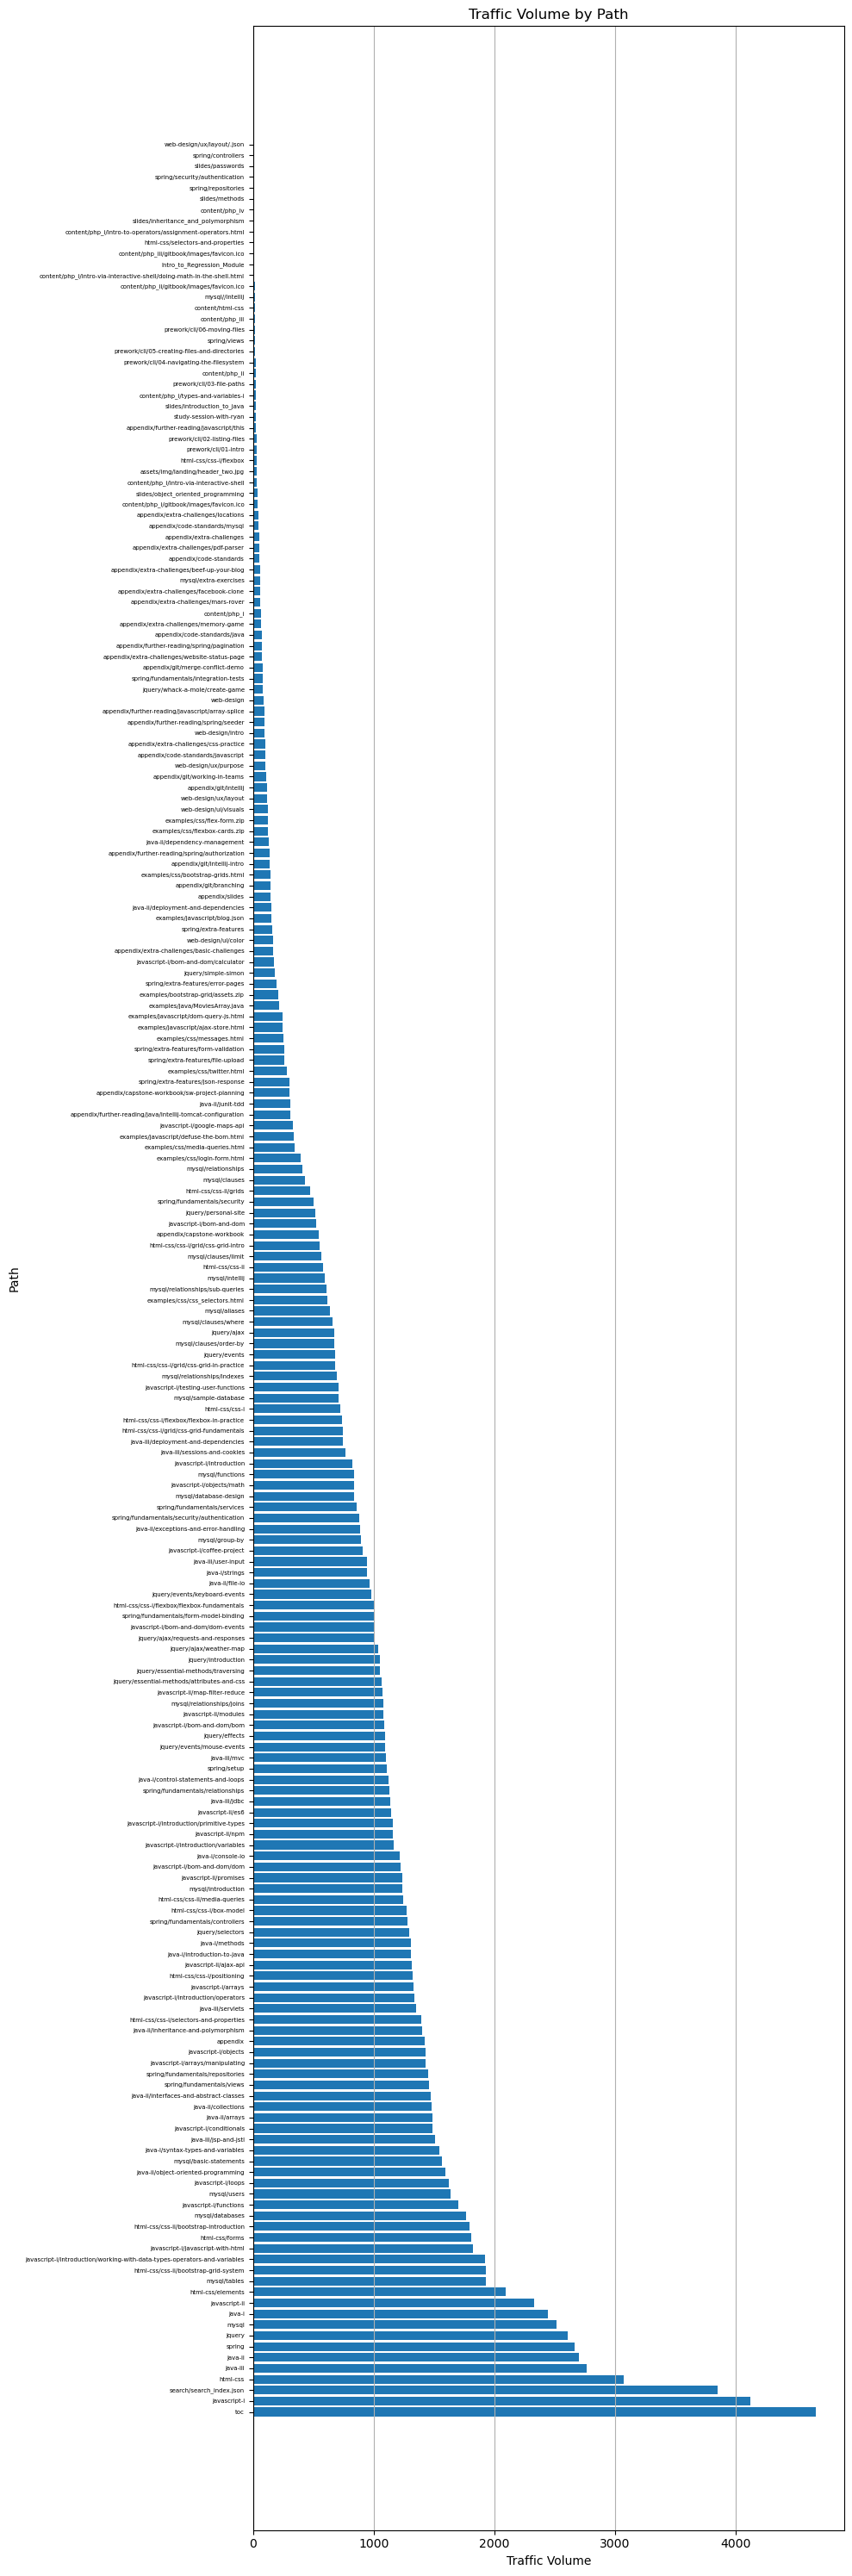

In [118]:
# Create a dataframe of the 2019 traffic from webdev students
wd_traffic = pd.DataFrame(df_f[df_f.program_id == 2].path.value_counts()).reset_index().rename(columns={'path': 'traffic_vol'})\
.rename(columns={'index': 'path'})

# Create a dataframe of the 2019 data, groupby traffic volume (each traffic amount theoretically is unique to each path)
# and sort to start with the highest volume paths first
temp = pd.merge(df_f[(df_f.program_id == 2) & (df_f.path != '/')], wd_traffic, on='path', how='left').groupby('traffic_vol')\
['path', 'traffic_vol'].max().sort_index(ascending=False)

# Plot the figure
plt.figure(figsize=(10, 30))
plt.barh(temp["path"], temp["traffic_vol"])
plt.xlabel("Traffic Volume")
plt.ylabel("Path")
plt.title("Traffic Volume by Path")
plt.yticks(fontsize=5)
plt.grid(axis='x')
plt.tight_layout()

## Observation:
- Webdev students didn't access datascience paths in 2019

## Next Step: check the dates when webdev paths were accessed by ds students

In [141]:
# Make a list of webdev paths that were accessed by ds students
check_paths = ['error-pages/asdfasdf', 'jquery', 'spring', 'java-i', 'toc', 'javascript-i', 'html-css']

In [130]:
# Set the datetime cause apparently it wasn't actually set earlier somehow
df_f.index = pd.to_datetime(df_f.index)
df.index = pd.to_datetime(df.index)

<Axes: xlabel='date'>

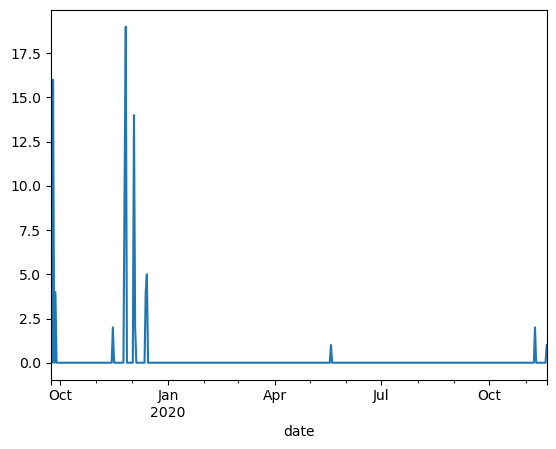

In [151]:
# create and plot a dataframe of 2019 traffic from ds students that matches the identified webdev paths aggregate to count the number
# of times a path was accessed in a day
df[(df.program_id == 3) & (df.path.str.contains('|'.join(check_paths)) & (df.name != 'Staff') )].resample('D').path.agg('count').plot()


## Observation:
- It appears that the access for data scientists to see web dev curriculum was turned off about 27 Oct 2019 and came back on again mid-November then was shut off again with a significantly lower amount of traffic later on in May and november 2020

## Summary:
- Webdev students didn't access the data science curriculum in 2019, although data scientists accessed the webdev curriculum
- It appears that the access for data scientists to see web dev curriculum was turned off about 27 Oct 2019
- It is impossible to determine if such access restrictions were made in the past because if there were data science cohorts before Aug 2018, they were not distinguished in the database by a cohort id

# Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

## For Webdev:

In [162]:
# Calculate the range that gives the top 30% of traffic more than 4 months after students leave
df[(df.index > pd.to_datetime(df.end_date) + timedelta(days=4*30)) & (df.program_id == 2) & (df.path != '/')].path.value_counts(normalize=True)\
.loc["javascript-i":"html-css/elements"].sum()

0.3036891519994336

In [161]:
# Display the paths that resulted in the top 30% of traffic to extract the topics that were revisited by webdev grads
df[(df.index > pd.to_datetime(df.end_date) + timedelta(days=4*30)) & (df.program_id == 2)]\
.groupby('path').time.count().sort_values(ascending=False).head(23)

path
/                                   9647
javascript-i                        3182
spring                              2529
html-css                            2424
search/search_index.json            2261
java-iii                            2261
java-ii                             2159
appendix                            1986
javascript-ii                       1828
toc                                 1799
java-i                              1777
mysql                               1656
jquery                              1585
jquery/ajax/weather-map             1197
spring/fundamentals/repositories    1035
spring/fundamentals/views            937
spring/fundamentals/controllers      885
classification/overview              852
java-iii/servlets                    833
sql/mysql-overview                   822
java-iii/jsp-and-jstl                782
spring/setup                         781
html-css/elements                    748
Name: time, dtype: int64

## Topics that webdev students continue to access more than 4 months after their graduation
Top 30% of all traffic:
- javascript -i
- spring
- html-css
- java -iii
- java -ii
- appendix
- javascript -ii
- toc
- java -i
- mysql
- jquery: main, weather map
- spring fundamentals: repositories, views, controllers
- java -iii: servlets
- SQL: mysql overview
- java-iii/jsp-and-jstl
- spring/setup
- html-css/elements

Every other page that was visited represents .6% or less of all traffic after 4 months of a student's graduation

## For data science:

In [157]:
# Calculate the range that gives the top 30% of traffic more than 4 months after students leave
df[(df.index > pd.to_datetime(df.end_date) + timedelta(days=4*30)) & (df.program_id == 3) & (df.path != '/') & (df.path != 'search/search_index.json ')].path.value_counts(normalize=True)\
.loc["classification/overview":"regression/evaluate"].sum()

0.302158273381295

In [155]:
# Display the paths that resulted in the top 30% of traffic to extract the topics that were revisited by ds grads
df[(df.index > pd.to_datetime(df.end_date) + timedelta(days=4*30)) & (df.program_id == 3)]\
.groupby('path').time.count().sort_values(ascending=False).head(22)

path
/                                                 462
search/search_index.json                          141
classification/overview                            79
classification/scale_features_or_not.svg           77
1-fundamentals/1.1-intro-to-data-science           73
1-fundamentals/AI-ML-DL-timeline.jpg               72
1-fundamentals/modern-data-scientist.jpg           72
fundamentals/AI-ML-DL-timeline.jpg                 64
fundamentals/modern-data-scientist.jpg             64
fundamentals/intro-to-data-science                 63
sql/mysql-overview                                 53
anomaly-detection/overview                         52
anomaly-detection/AnomalyDetectionCartoon.jpeg     51
regression/model                                   39
classification/prep                                39
clustering/wrangle                                 34
timeseries/modeling-lesson1                        31
classification/evaluation                          31
classification/explore 

## Topics that data science students continue to access more than 4 months after their graduation
Most often (Top 30% of all traffic):
- Classification overview and 'scale-features-or-not' were the most often revisited paths, even more often than fundamentals.
- Data Science Fundamentals: intro to data science, git
- SQL overview
- Anomaly detection: overview
- Regression, model: split-and-scale, evaluate
- Classification: decision trees
- Clustering: wrangle, explore, model
- Timeseries modeling
- Python: introduction

Every other page that was visited represents .8% or less of all traffic 4 months after a student's graduation

#
# Email Draft:
#

# Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

## Findings:
- It appears that the access for data scientists to see web dev curriculum was turned off about 27 Oct 2019

- The access was turned back on in November 2019 and May and November 2020, at these dates some student users engaged in minor traffic to the webdev curriculum.

- It is impossible to determine if such access restrictions were made in the past given the information in these tables, because if there were data science cohorts before Aug 2018, they were not distinguished in the database by a cohort id


# Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

## Findings:
## Topics that webdev students continue to access more than 4 months after their graduation
Top 30% of all traffic, in order of most visited:
- javascript -i
- spring: general, setup
- html-css: general, elements
- java -iii: general, servlets, jsp-and-jstl
- java -ii
- appendix
- javascript -ii
- toc
- java -i
- mysql
- jquery: main, weather map
- spring fundamentals: repositories, views, controllers
- SQL: mysql overview

Every other page not on this list that was visited by a web dev alumni 4 months after their graduation represents .6% or less of all such traffic. 

## Topics that data science students continue to access more than 4 months after their graduation
Top 30% of all traffic, in order of most visited:
- Classification: overview and 'scale-features-or-not'
- Data Science Fundamentals: intro to data science, git
- SQL overview
- Anomaly detection: overview
- Regression, model: split-and-scale, evaluate
- Classification: decision trees
- Clustering: wrangle, explore, model
- Timeseries modeling
- Python: introduction

Every other page not on this list that was visited by a data science alumni 4 months after their graduation represents .8% or less of all such traffic. 